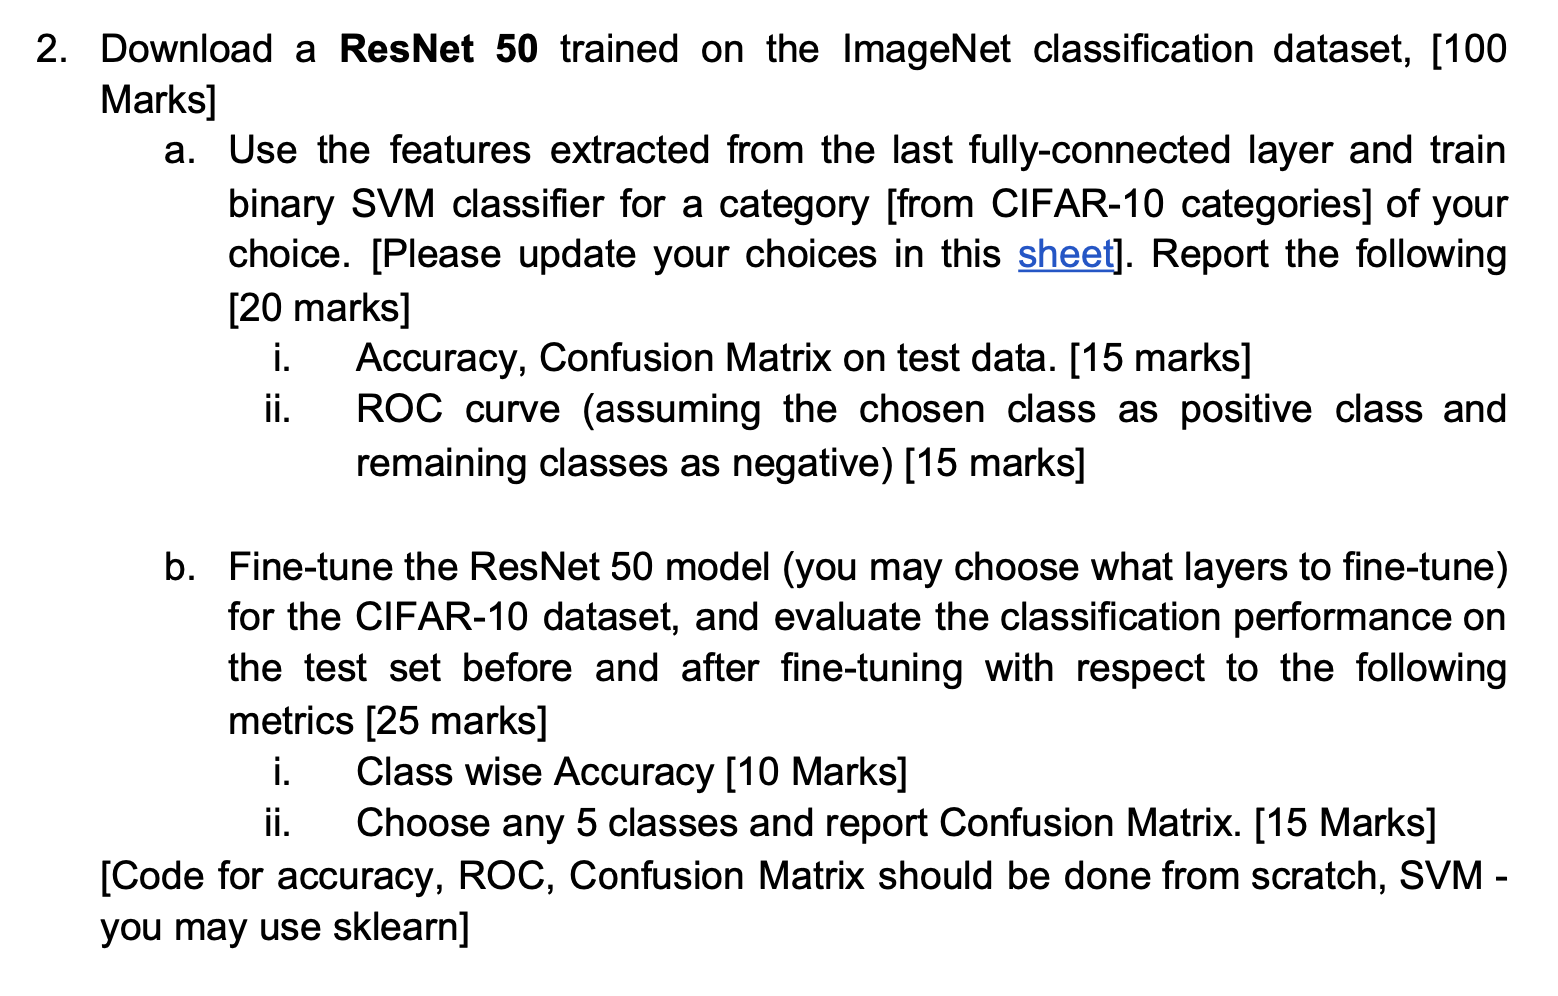

In [6]:

import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torchvision.models as models
from torch.autograd import Variable




transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data',train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1000,shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000,shuffle=False)


resnet50 = models.resnet50(pretrained=True)
modules=list(resnet50.children())[:-1]
resnet50=nn.Sequential(*modules)
for p in resnet50.parameters():
    p.requires_grad = False



label_master = []
for (image, label) in trainloader:
    label_slave = []



    for i in label:
        if i != 1:
            j = 0
            label_slave.append(j)
        else:
            label_slave.append(i)
    label_master = label_master + label_slave

 

final_label_train = torch.FloatTensor(label_master)



label_master_test = []
for (image, label) in testloader:
    label_slave_test = []



    for i in label:
        if i != 1:
            j = 0
            label_slave_test.append(j)
        else:
            label_slave_test.append(i)
    label_master = label_master_test + label_slave_test

 

final_label_test = torch.FloatTensor(label_master_test)





train_features = torch.zeros((0,2048))
for i, data in tqdm(enumerate(trainloader, 0)):
    inputs, labels = data
    features_var = resnet50(inputs)
    features_var = torch.reshape(features_var,(1000,2048))
    train_features = torch.vstack((train_features,features_var))



"""Please refer these links to Install ThunderSVM:

 ref: https://github.com/Xtra-Computing/thundersvm
 
 https://stackoverflow.com/questions/55224016/importerror-libcublas-so-10-0-cannot-open-shared-object-file-no-such-file-or

"""




test_features = torch.zeros((0,2048))
for i, data in tqdm(enumerate(testloader, 0)):
    inputs, labels = data
    features_var = resnet50(inputs)
    features_var = torch.reshape(features_var,(1000,2048))
    test_features = torch.vstack((test_features,features_var))

!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!ls  # Check if required cuda 9.0 amd64-deb file is downloaded
!dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!ls /var/cuda-repo-9-0-local | grep .pub
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!sudo apt-get install cuda-9.0




# ref: https://github.com/Xtra-Computing/thundersvm
# https://stackoverflow.com/questions/55224016/importerror-libcublas-so-10-0-cannot-open-shared-object-file-no-such-file-or

!pip install thundersvm
from thundersvm import SVC
model = SVC(C=100, kernel='rbf')
model.fit(train_features, final_label_train)

predictions = model.predict(test_features)
probablities = model.predict_proba(test_features)


Files already downloaded and verified
Files already downloaded and verified



0it [00:00, ?it/s]
1it [00:07,  7.77s/it]
2it [00:15,  7.77s/it]
3it [00:23,  7.79s/it]
4it [00:31,  7.78s/it]
5it [00:38,  7.79s/it]
6it [00:46,  7.76s/it]
7it [00:54,  7.77s/it]
8it [01:02,  7.74s/it]
9it [01:09,  7.73s/it]
10it [01:17,  7.72s/it]
11it [01:25,  7.73s/it]
12it [01:33,  7.79s/it]
13it [01:40,  7.77s/it]
14it [01:48,  7.78s/it]
15it [01:56,  7.73s/it]
16it [02:04,  7.74s/it]
17it [02:11,  7.77s/it]
18it [02:19,  7.79s/it]
19it [02:27,  7.82s/it]
20it [02:35,  7.85s/it]
21it [02:43,  7.91s/it]
22it [02:51,  7.88s/it]
23it [02:59,  7.88s/it]
24it [03:07,  7.84s/it]
25it [03:14,  7.84s/it]
26it [03:22,  7.85s/it]
27it [03:30,  7.85s/it]
28it [03:38,  7.84s/it]
29it [03:46,  7.83s/it]
30it [03:54,  7.86s/it]
31it [04:02,  7.85s/it]
32it [04:09,  7.87s/it]
33it [04:17,  7.89s/it]
34it [04:25,  7.90s/it]
35it [04:33,  7.89s/it]
36it [04:41,  7.87s/it]
37it [04:49,  7.86s/it]
38it [04:57,  7.88s/it]
39it [05:05,  7.88s/it]
40it [05:12,  7.85s/it]
41it [05:20,  7.83s/it]
42it 

--2021-01-10 17:05:49--  https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.0.24
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.0.24|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64.deb?VetAMqWwbl_miTIUKYdSB5-EYFQCK8j8bQ1NAp_SbqbfWl0TOy6GckbG10zVZLK27tHe1sIOsGAd2qliX-e-JSTJxu2Noc2ZNO-oMyfhZ1Y2ztOkdVHl80mJq6Ey6wPKP2rr-mft2HT1XIt333Ks19vXFPzVPfocLlMez4jSpGzzLbkNwIpycG_yux_UDB_haAvqvkl3Cz2H48cQEBPq [following]
--2021-01-10 17:05:49--  https://developer.download.nvidia.com/compute/cuda/9.0/secure/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64.deb?VetAMqWwbl_miTIUKYdSB5-EYFQCK8j8bQ1NAp_SbqbfWl0TOy6GckbG10zVZLK27tHe1sIOsGAd2qliX-e-JSTJxu2Noc2ZNO-oMyfhZ1Y2ztOkdVHl

In [12]:

final_label_test

tensor([])

In [13]:
label_test = []
for image , label in testloader:
    label1 = []
    for i in label:
        if i!= 1:
           j= 0
           label1.append(j)
        else:

           label1.append(i)
    label_test = label_test + label1

final_label_test = np.array(label_test)


In [14]:
final_label_test

array([0, 0, 0, ..., 0, 1, 0])

In [15]:
Y_test = final_label_test
Y_pred = predictions

In [16]:
print(Y_test.shape)
print(Y_pred.shape)

(10000,)
(10000,)


Text(91.68, 0.5, 'predicted label')

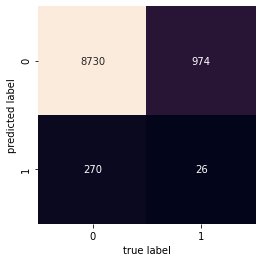

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred))
print("Classification report")
print(classification_report(Y_test,Y_pred))

Confusion Matrix
[[8730  270]
 [ 974   26]]
Classification report
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      9000
           1       0.09      0.03      0.04      1000

    accuracy                           0.88     10000
   macro avg       0.49      0.50      0.49     10000
weighted avg       0.82      0.88      0.84     10000



In [19]:
# From Scratch
# Confusion matrix
rows, cols = (2, 2)
labels = np.array([0,1])
# arr = [[0]*cols]*rows 
arr = np.zeros((len(labels), len(labels)))
for i in range(rows):
  for j in range(cols):
    arr[i,j] = np.sum((Y_test == labels[i]) & (Y_pred == labels[j]))  

print(np.array(arr).T)

# Accuracy

correct = 0
for i in range(len(Y_test)):
  if Y_test[i] == Y_pred[i]:
    correct += 1
print( correct / float(len(Y_test)) * 100.0)

[[8730.  974.]
 [ 270.   26.]]
87.56


In [23]:
# probablities???